In [1]:
import numpy as np


def sigmoid(x):
    return 1/(1+np.exp(-x))


print(sigmoid(13))
print(sigmoid(-9))
print(sigmoid(1))

0.999997739675702
0.00012339457598623172
0.7310585786300049


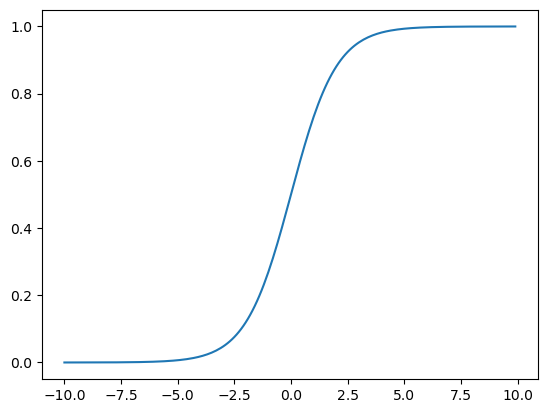

In [4]:
# arrange numbers from -1000 to 1000 with 0.1 step
x = np.arange(-10, 10, 0.1)

# plot sigmoid function from x
import matplotlib.pyplot as plt
plt.plot(x, sigmoid(x))


In [16]:
import numpy as np

X = np.array([ [3, 7], [5, 1], [10, 2]])
w1 = np.array([[2, 4, -2], [1, -3, 1]])
w2 = np.array([-3, 2, 4])
z2 = X@w1
y = np.array([75, 82, 93])
print(z2)


[[ 13  -9   1]
 [ 11  17  -9]
 [ 22  34 -18]]


In [17]:
a2 = sigmoid(z2)
print(a2)

[[9.99997740e-01 1.23394576e-04 7.31058579e-01]
 [9.99983299e-01 9.99999959e-01 1.23394576e-04]
 [1.00000000e+00 1.00000000e+00 1.52299795e-08]]


In [18]:
z3 = a2@w2
print(z3)

[-0.07551212 -0.9994564  -0.99999994]


In [19]:
y_hat = sigmoid(z3)
print(y_hat)

[0.48113094 0.26904831 0.26894143]


In [21]:
print(y)

[75 82 93]


In [23]:
z2 = X@w1
a2 = sigmoid(z2)
z3 = a2@w2
y_hat = sigmoid(z3)
print(y_hat)

[0.48113094 0.26904831 0.26894143]


In [24]:
y_hat=sigmoid(sigmoid(X@w1)@w2)
print(y_hat)

[0.48113094 0.26904831 0.26894143]


In [25]:
loss = np.sum(0.5*(y-y_hat)**2)
print(loss)

10416.029766522606


In [26]:
loss = np.sum(0.5*(y-sigmoid(sigmoid(X@w1)@w2))**2)
print(loss)

10416.029766522606


In [54]:
import torch

X = torch.tensor([ [3.0, 7.0], [5.0, 1.0], [10.0, 2.0]])
w1 = torch.tensor([[2.0, 4.0, -2.0], [1.0, -3.0, 1.0]], requires_grad=True)
w2 = torch.tensor([-3.0, 2.0, 4.0], requires_grad=True)
y = torch.tensor([75.0, 82.0, 93.0])

In [55]:
z2 = X@w1
a2 = torch.sigmoid(z2)
z3 = a2@w2
y_hat=torch.sigmoid(z3)
print(y_hat)

tensor([0.4811, 0.2690, 0.2689], grad_fn=<SigmoidBackward0>)


In [56]:
loss = torch.sum((y-y_hat)**2)
loss

tensor(20832.0586, grad_fn=<SumBackward0>)

In [57]:
loss.backward()  # Ableitung erstellen

In [52]:
w1.grad

tensor([[ 8.8059e-03, -2.7543e-02, -8.7862e+01],
        [ 3.3792e-03, -6.4267e-02, -2.0484e+02]])

In [51]:
w2.grad

tensor([-105.8165,  -68.6153,  -27.2040])

In [59]:
lr = 0.0001
with torch.no_grad():   # das hier jetzt bitte nicht ableiten
    w1.sub_(w1.grad*lr)
    w2.sub_(w2.grad*lr)


In [62]:
# jetzt mal mit Lernschleife

In [103]:
def mean_absolute_error(y, y_hat):
    return torch.mean(torch.abs(y-y_hat)).item()

mae: 10.171587944030762
forward:  tensor([55.4847, 82.4221, 82.4226], grad_fn=<MvBackward0>)
y tensor([75., 82., 93.])


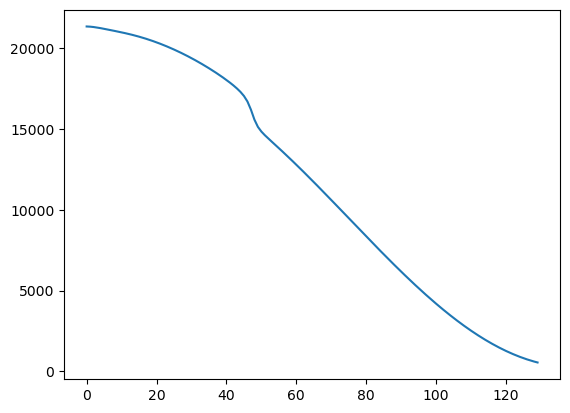

In [121]:
X = torch.tensor([ [3.0, 7.0], [5.0, 1.0], [10.0, 2.0]])
w1 = torch.tensor([[2.0, 4.0, -2.0], [1.0, -3.0, 1.0]], requires_grad=True)
w2 = torch.tensor([-3.0, 2.0, 4.0], requires_grad=True)
y = torch.tensor([75.0, 82.0, 93.0])

def forward(X):
    z2 = X@w1
    a2 = torch.sigmoid(z2)
    z3 = a2@w2
    y_hat=z3
    return y_hat

lr = 0.00001
losses=[]
for i in range(130):
    y_hat=forward(X)
    loss = torch.sum((y-y_hat)**2)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
        w1.sub_(w1.grad*lr)
        w2.sub_(w2.grad*lr)

plt.plot(losses)

y_hat=forward(X)
print("mae:" , mean_absolute_error(y, y_hat))
print("forward: ", y_hat)
print("y", y)

In [81]:
y

tensor([75., 82., 93.])

mae: 0.09126127511262894
forward:  tensor([[0.9075],
        [0.8478],
        [0.9487]], grad_fn=<MmBackward0>)
y tensor([0.7500, 0.8200, 0.9300])


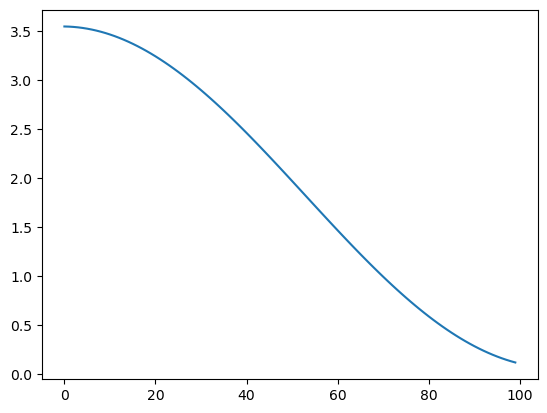

In [120]:
X = torch.tensor([ [3.0, 7.0], [5.0, 1.0], [10.0, 2.0]])
w1 = torch.rand((2, 3), requires_grad=True)
w2 = torch.rand((3, 1), requires_grad=True)
y = torch.tensor([75.0, 82.0, 93.0])

X = X/torch.max(X)
y = y / 100


def forward(X):
    z2 = X@w1
    a2 = torch.sigmoid(z2)
    z3 = a2@w2
    y_hat=z3
    return y_hat

lr = 0.00001
losses=[]
for i in range(100):
    y_hat=forward(X)
    loss = torch.sum((y-y_hat)**2)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
        w1.sub_(w1.grad*lr)
        w2.sub_(w2.grad*lr)

plt.plot(losses)

y_hat=forward(X)
print("mae:" , mean_absolute_error(y, y_hat))
print("forward: ", y_hat)
print("y", y)

In [95]:
y

tensor([0.7500, 0.8200, 0.9300])

mae: 0.16238075494766235
forward:  tensor([[0.6920],
        [0.6449],
        [0.6760]], grad_fn=<MmBackward0>)
y tensor([0.7500, 0.8200, 0.9300])


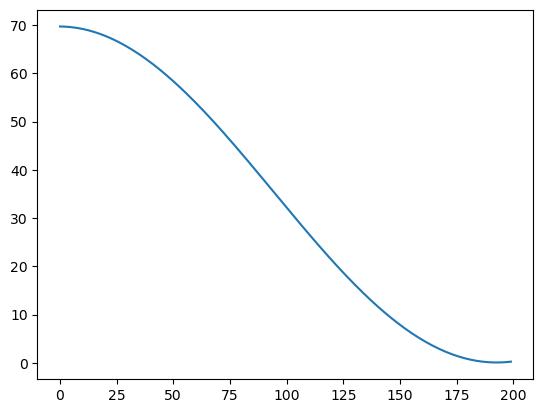

In [147]:
X = torch.tensor([ [3.0, 7.0], [5.0, 1.0], [10.0, 2.0]])
w1 = torch.rand((2, 10), requires_grad=True)
w2 = torch.rand((10, 1), requires_grad=True)
y = torch.tensor([75.0, 82.0, 93.0])

X = X/torch.max(X)
y = y / 100


def forward(X):
    z2 = X@w1
    a2 = torch.sigmoid(z2)
    z3 = a2@w2
    y_hat=z3
    return y_hat

lr = 0.000001
wd=0.00001
losses=[]
for i in range(200):
    y_hat=forward(X)
    loss = torch.sum((y-y_hat)**2) + (wd*(torch.sum(w1**2) + torch.sum(w2**2)))
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
        w1.sub_(w1.grad*lr)
        w2.sub_(w2.grad*lr)

plt.plot(losses)

y_hat=forward(X)
print("mae:" , mean_absolute_error(y, y_hat))
print("forward: ", y_hat)
print("y", y)

mae: 0.4213916063308716
forward:  tensor([[0.5179],
        [0.3930],
        [0.3249]], grad_fn=<MmBackward0>)
y tensor([0.7500, 0.8200, 0.9300])


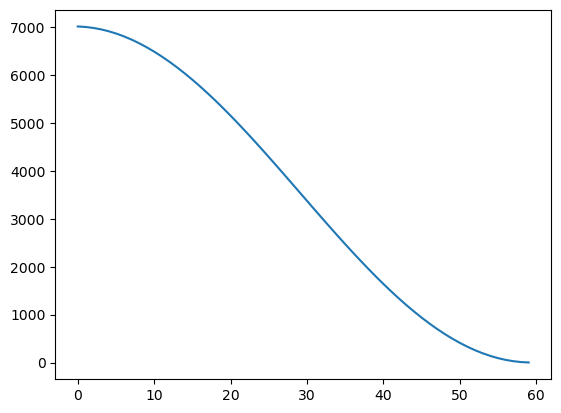

In [140]:
X = torch.tensor([ [3.0, 7.0], [5.0, 1.0], [10.0, 2.0]])
w1 = torch.rand((2, 100), requires_grad=True)
w2 = torch.rand((100, 1), requires_grad=True)
y = torch.tensor([75.0, 82.0, 93.0])

X = X/torch.max(X)
y = y / 100


def forward(X):
    z2 = X@w1
    a2 = torch.sigmoid(z2)
    z3 = a2@w2
    y_hat=z3
    return y_hat

lr = 0.000001
losses=[]
for i in range(60):
    y_hat=forward(X)
    loss = torch.sum((y-y_hat)**2)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
        w1.sub_(w1.grad*lr)
        w2.sub_(w2.grad*lr)

plt.plot(losses)

y_hat=forward(X)
print("mae:" , mean_absolute_error(y, y_hat))
print("forward: ", y_hat)
print("y", y)

mae: 0.22494980692863464
forward:  tensor([[1.0583],
        [1.0579],
        [1.0586]], grad_fn=<MmBackward0>)
y tensor([0.7500, 0.8200, 0.9300])


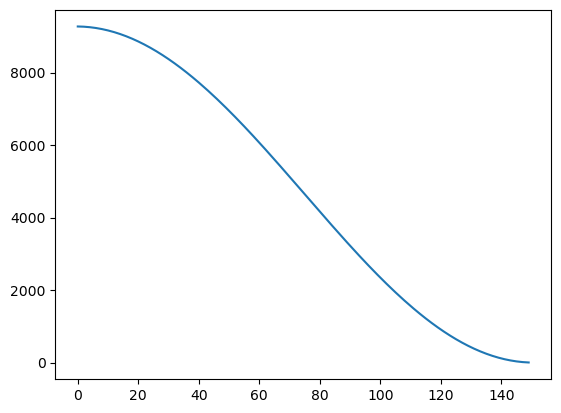

In [144]:
X = torch.tensor([ [3.0, 7.0], [5.0, 1.0], [10.0, 2.0]])
w1 = torch.rand((2, 30), requires_grad=True)
w2 = torch.rand((30, 60), requires_grad=True)
w3 = torch.rand((60, 1), requires_grad=True)
y = torch.tensor([75.0, 82.0, 93.0])

X = X/torch.max(X)
y = y / 100


def forward(X):
    z2 = X@w1
    a2 = torch.sigmoid(z2)
    z3 = a2@w2
    a3 = torch.sigmoid(z3)
    z4 = a3@w3
    y_hat=z4
    return y_hat

lr = 0.0000001
losses=[]
for i in range(150):
    y_hat=forward(X)
    loss = torch.sum((y-y_hat)**2)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
        w1.sub_(w1.grad*lr)
        w2.sub_(w2.grad*lr)
        w3.sub_(w3.grad*lr)

plt.plot(losses)

y_hat=forward(X)
print("mae:" , mean_absolute_error(y, y_hat))
print("forward: ", y_hat)
print("y", y)

In [145]:
w1.grad

tensor([[16.6914, 13.1607, 15.9276, 18.9989, 16.4109, 12.8253, 11.7912, 12.5928,
         16.3380, 13.8473, 14.7388, 20.2648, 14.9663, 13.1806, 13.0963, 13.0882,
         19.5136, 16.8054, 16.9253, 12.5912, 14.6690, 12.3444, 13.9448, 19.6905,
         16.6116, 17.0622, 15.4364, 13.9688, 17.0451, 17.2966],
        [ 8.9824,  6.9671,  8.6221, 10.3002,  8.9388,  7.3841,  6.6020,  6.5884,
          8.4368,  7.4348,  7.5766, 10.8696,  8.1667,  7.1865,  6.8510,  7.0860,
         10.6643,  8.6927,  9.6948,  6.7068,  7.7552,  6.2634,  7.0917, 10.7555,
          8.9497,  9.1094,  8.6731,  7.8259,  9.5581,  9.1687]])

mae: 0.20899087190628052
forward:  tensor([[0.6243],
        [0.6243],
        [0.6243]], grad_fn=<MmBackward0>)
y tensor([0.7500, 0.8200, 0.9300])


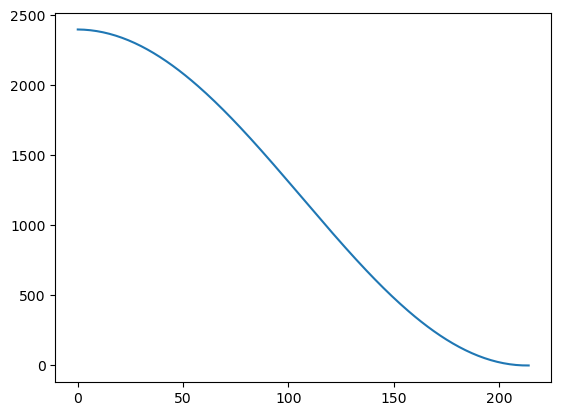

In [135]:
X = torch.tensor([ [3.0, 7.0], [5.0, 1.0], [10.0, 2.0]])
w1 = torch.rand((2, 30), requires_grad=True)
w2 = torch.rand((30, 60), requires_grad=True)
w3 = torch.rand((60, 30), requires_grad=True)
w4  = torch.rand((30, 1), requires_grad=True)
y = torch.tensor([75.0, 82.0, 93.0])

X = X/torch.max(X)
y = y / 100


def forward(X):
    z2 = X@w1
    a2 = torch.sigmoid(z2)
    z3 = a2@w2
    a3 = torch.sigmoid(z3)
    z4 = a3@w3
    a4 = torch.sigmoid(z4)
    z5 = a4@w4
    y_hat=z5
    return y_hat

lr = 0.0000001
losses=[]
for i in range(215):
    y_hat=forward(X)
    loss = torch.sum((y-y_hat)**2)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
        w1.sub_(w1.grad*lr)
        w2.sub_(w2.grad*lr)
        w3.sub_(w3.grad*lr)
        w4.sub_(w4.grad*lr)

plt.plot(losses)

y_hat=forward(X)
print("mae:" , mean_absolute_error(y, y_hat))
print("forward: ", y_hat)
print("y", y)